# ANALYZING CORONA VIRUS IN SOUTH AFRICA

In [61]:
import time
import datetime
import random
import math
from math import *
import operator
import pandas as pd
import numpy as np

#import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
#(in order to see the graph of code within the editor, we put the following statement)
%matplotlib inline
import matplotlib.colors as mcolors

import seaborn as sns
sns.set(style= "white", color_codes=True)
sns.set(font_scale=1.5)

#Load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import  make_regression

#import Machine Learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures

#importing libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA

# Loading the dasasets

In [62]:
Confirmed = pd.read_excel("Confirmed_cases.xlsx")
Confirmed

,Province,Lat,Long,5/03/2020,6/03/2020,7/03/2020,8/03/2020,9/03/2020,10/03/2020,11/03/2020,...,22/07/2020,23/07/2020,24/07/2020,25/07/2020,26/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020
0,Eastern Cape,27.2610,32.5112,0,0,0,0,0,0,0,...,67818,69445,71338,72772,73585,74231,75067,75872,77055,77938
1,Free State,26.1251,29.0658,0,0,0,0,0,0,0,...,12332,13443,14542,15512,16482,17222,18134,19207,20398,21262
2,Gauteng,28.0224,26.1222,0,0,1,1,1,0,5,...,144582,148854,153020,156821,160154,162319,164584,168369,171574,175272
3,Kwazulu Natal,30.2256,29.3605,1,0,1,2,6,0,7,...,50521,53406,57162,60532,64061,65982,68101,71240,73919,76706
4,Limpopo,29.2721,23.5445,0,0,0,0,0,0,0,...,5712,6068,6394,6732,7076,7260,7502,7840,8240,8565
5,Mpumalanga,30.5819,25.2615,0,0,0,0,0,0,0,...,8286,8987,9756,10417,11008,11386,11552,12442,13280,14101
6,Northern Cape,24.4608,28.4410,0,0,0,0,0,0,0,...,2727,2970,3175,3389,3600,3875,3997,4135,4402,4741
7,North West,25.3642,25.5003,0,0,0,0,0,0,0,...,15073,15901,16548,16942,17338,17604,17791,18231,18811,19325
8,Western Cape,18.2507,33.5527,0,0,0,0,0,0,1,...,87847,88928,90011,91033,92079,92600,92983,93737,94440,95223
9,Unallocated,0.0000,0.0000,0,0,0,0,0,0,0,...,50,50,50,50,50,50,50,50,50,50


In [63]:
Deaths = pd.read_excel("Death_cases.xlsx")
Deaths

,Province,Lat,Long,5/03/2020,6/03/2020,7/03/2020,8/03/2020,9/03/2020,10/03/2020,11/03/2020,...,22/07/2020,23/07/2020,24/07/2020,25/07/2020,26/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020
0,Eastern Cape,27.2610,32.5112,0,0,0,0,0,0,0,...,1345,1393,1406,1450,1457,1534,1545,1579,1700,1708
1,Free State,26.1251,29.0658,0,0,0,0,0,0,0,...,62,62,63,63,63,154,154,154,154,154
2,Gauteng,28.0224,26.1222,0,0,0,0,0,0,0,...,1156,1187,1326,1535,1564,1625,1680,1836,1932,2035
3,Kwazulu Natal,30.2256,29.3605,0,0,0,0,0,0,0,...,477,515,565,602,614,623,685,712,767,803
4,Limpopo,29.2721,23.5445,0,0,0,0,0,0,0,...,33,33,33,33,67,67,67,67,67,67
5,Mpumalanga,30.5819,25.2615,0,0,0,0,0,0,0,...,52,52,52,52,52,65,65,65,65,78
6,Northern Cape,24.4608,28.4410,0,0,0,0,0,0,0,...,15,23,23,27,29,29,29,29,29,29
7,North West,25.3642,25.5003,0,0,0,0,0,0,0,...,48,48,48,48,48,59,72,72,81,81
8,Western Cape,18.2507,33.5527,0,0,0,0,0,0,0,...,2752,2780,2827,2845,2875,2911,2960,2983,3017,3050
9,Unallocated,0.0000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
Recoveries = pd.read_excel("Recovery_cases.xlsx")
Recoveries

,Province,Lat,Long,5/03/2020,6/03/2020,7/03/2020,8/03/2020,9/03/2020,10/03/2020,11/03/2020,...,22/07/2020,23/07/2020,24/07/2020,25/07/2020,26/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020
0,Eastern Cape,27.2610,32.5112,0,0,0,0,0,0,0,...,49938,53591,55692,57531,58290,58685,60745,62371,63903,65512
1,Free State,26.1251,29.0658,0,0,0,0,0,0,0,...,1315,1821,1873,2064,2075,2087,2178,2178,2178,7063
2,Gauteng,28.0224,26.1222,0,0,0,0,0,0,0,...,77397,77397,82126,92346,92346,97485,102614,105614,111061,117099
3,Kwazulu Natal,30.2256,29.3605,0,0,0,0,0,0,0,...,18067,18786,18786,21251,21251,24350,27682,32483,32483,35113
4,Limpopo,29.2721,23.5445,0,0,0,0,0,0,0,...,2518,2781,3022,3243,3466,3565,3565,3637,4700,5044
5,Mpumalanga,30.5819,25.2615,0,0,0,0,0,0,0,...,3435,4018,4403,4995,4995,5494,5812,6393,6854,6854
6,Northern Cape,24.4608,28.4410,0,0,0,0,0,0,0,...,1100,1152,1177,1190,1223,1223,1244,1275,1341,1389
7,North West,25.3642,25.5003,0,0,0,0,0,0,0,...,3914,4019,4795,5447,6076,6441,6638,7181,8160,8256
8,Western Cape,18.2507,33.5527,0,0,0,0,0,0,0,...,71491,72695,73897,74987,75355,75595,76835,76835,78921,79841
9,Unallocated,0.0000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Extracting column and checking if my columns length are all the same

In [65]:
cols = Confirmed.keys()
cols

Index(['Province', 'Lat', 'Long', '5/03/2020', '6/03/2020', '7/03/2020',
       '8/03/2020', '9/03/2020', '10/03/2020', '11/03/2020',
       ...
       '22/07/2020', '23/07/2020', '24/07/2020', '25/07/2020', '26/07/2020',
       '27/07/2020', '28/07/2020', '29/07/2020', '30/07/2020', '31/07/2020'],
      dtype='object', length=152)

In [66]:
cols1 = Deaths.keys()
cols1

Index(['Province', 'Lat', 'Long', '5/03/2020', '6/03/2020', '7/03/2020',
       '8/03/2020', '9/03/2020', '10/03/2020', '11/03/2020',
       ...
       '22/07/2020', '23/07/2020', '24/07/2020', '25/07/2020', '26/07/2020',
       '27/07/2020', '28/07/2020', '29/07/2020', '30/07/2020', '31/07/2020'],
      dtype='object', length=152)

In [67]:
cols2 = Recoveries.keys()
cols2

Index(['Province', 'Lat', 'Long', '5/03/2020', '6/03/2020', '7/03/2020',
       '8/03/2020', '9/03/2020', '10/03/2020', '11/03/2020',
       ...
       '22/07/2020', '23/07/2020', '24/07/2020', '25/07/2020', '26/07/2020',
       '27/07/2020', '28/07/2020', '29/07/2020', '30/07/2020', '31/07/2020'],
      dtype='object', length=152)

# Extracting date columns on all the datasets

In [68]:

confirmed = Confirmed.loc[:, cols[3]:cols[-1]]
confirmed.head()

,5/03/2020,6/03/2020,7/03/2020,8/03/2020,9/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,...,22/07/2020,23/07/2020,24/07/2020,25/07/2020,26/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020
0,0,0,0,0,0,0,0,0,0,0,...,67818,69445,71338,72772,73585,74231,75067,75872,77055,77938
1,0,0,0,0,0,0,0,0,0,0,...,12332,13443,14542,15512,16482,17222,18134,19207,20398,21262
2,0,0,1,1,1,0,5,6,10,17,...,144582,148854,153020,156821,160154,162319,164584,168369,171574,175272
3,1,0,1,2,6,0,7,8,10,11,...,50521,53406,57162,60532,64061,65982,68101,71240,73919,76706
4,0,0,0,0,0,0,0,0,0,0,...,5712,6068,6394,6732,7076,7260,7502,7840,8240,8565


In [69]:
deaths = Deaths.loc[:, cols[3]:cols[-1]]
deaths.head()

,5/03/2020,6/03/2020,7/03/2020,8/03/2020,9/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,...,22/07/2020,23/07/2020,24/07/2020,25/07/2020,26/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020
0,0,0,0,0,0,0,0,0,0,0,...,1345,1393,1406,1450,1457,1534,1545,1579,1700,1708
1,0,0,0,0,0,0,0,0,0,0,...,62,62,63,63,63,154,154,154,154,154
2,0,0,0,0,0,0,0,0,0,0,...,1156,1187,1326,1535,1564,1625,1680,1836,1932,2035
3,0,0,0,0,0,0,0,0,0,0,...,477,515,565,602,614,623,685,712,767,803
4,0,0,0,0,0,0,0,0,0,0,...,33,33,33,33,67,67,67,67,67,67


In [70]:
recoveries = Recoveries.loc[:, cols[3]:cols[-1]]
recoveries.head()

,5/03/2020,6/03/2020,7/03/2020,8/03/2020,9/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,...,22/07/2020,23/07/2020,24/07/2020,25/07/2020,26/07/2020,27/07/2020,28/07/2020,29/07/2020,30/07/2020,31/07/2020
0,0,0,0,0,0,0,0,0,0,0,...,49938,53591,55692,57531,58290,58685,60745,62371,63903,65512
1,0,0,0,0,0,0,0,0,0,0,...,1315,1821,1873,2064,2075,2087,2178,2178,2178,7063
2,0,0,0,0,0,0,0,0,0,0,...,77397,77397,82126,92346,92346,97485,102614,105614,111061,117099
3,0,0,0,0,0,0,0,0,0,0,...,18067,18786,18786,21251,21251,24350,27682,32483,32483,35113
4,0,0,0,0,0,0,0,0,0,0,...,2518,2781,3022,3243,3466,3565,3565,3637,4700,5044


In [71]:
#Calculating sum of cases. then appending them to the empty lists

dates = confirmed.keys()
Country_cases =[]
sum_deaths =[]
sum_recovered = []
sum_active = []
mortality_rate = []
recovery_rate = []

EC_cases = []
FS_cases = []
GP_cases = []
KZN_cases = []
LP_cases = []
MP_cases = []
NC_cases = []
NW_cases = []
WC_cases = []
UA_cases = []

EC_deaths = []
FS_deaths = []
GP_deaths = []
KZN_deaths = []
LP_deaths = []
MP_deaths = []
NC_deaths = []
NW_deaths = []
WC_deaths = []
UA_deaths = []


EC_recoveries = []
FS_recoveries = []
GP_recoveries = []
KZN_recoveries = []
LP_recoveries = []
MP_recoveries = []
NC_recoveries = []
NW_recoveries = []
WC_recoveries = []
UA_recoveries = []




In [72]:
#appending values to the above empty lists
#and as additton, calculating the total mortality rate by diving sum of death with sum of confimed
for i in dates:
    Total_confirmed = confirmed[i].sum()
    Total_death = deaths[i].sum()
    Total_recovered = recoveries[i].sum()
    
    Country_cases.append(Total_confirmed)
    sum_deaths.append(Total_death)
    sum_recovered.append(Total_recovered)
    sum_active.append(Total_confirmed-Total_death-Total_recovered)
    mortality_rate.append(Total_death/Total_confirmed)
    recovery_rate.append(Total_recovered/Total_confirmed)
    
    
    EC_cases.append(Confirmed[Confirmed['Province']=='Eastern Cape'][i].sum())
    FS_cases.append(Confirmed[Confirmed['Province']=='Free State'][i].sum())
    GP_cases.append(Confirmed[Confirmed['Province']=='Gauteng'][i].sum())
    KZN_cases.append(Confirmed[Confirmed['Province']=='Kwazulu Natal'][i].sum())
    LP_cases.append(Confirmed[Confirmed['Province']=='Limpopo'][i].sum())
    MP_cases.append(Confirmed[Confirmed['Province']=='Mpumalanga'][i].sum())
    NC_cases.append(Confirmed[Confirmed['Province']=='Northern Cape'][i].sum())
    NW_cases.append(Confirmed[Confirmed['Province']=='North West'][i].sum())
    WC_cases.append(Confirmed[Confirmed['Province']=='Western Cape'][i].sum())
    UA_cases.append(Confirmed[Confirmed['Province']=='Unallocated'][i].sum())
    
    EC_deaths.append(Deaths[Deaths['Province']=='Eastern Cape'][i].sum())
    FS_deaths.append(Deaths[Deaths['Province']=='Free State'][i].sum())
    GP_deaths.append(Deaths[Deaths['Province']=='Gauteng'][i].sum())
    KZN_deaths.append(Deaths[Deaths['Province']=='Kwazulu Natal'][i].sum())
    LP_deaths.append(Deaths[Deaths['Province']=='Limpopo'][i].sum())
    MP_deaths.append(Deaths[Deaths['Province']=='Mpumalanga'][i].sum())
    NC_deaths.append(Deaths[Deaths['Province']=='Northern Cape'][i].sum())
    NW_deaths.append(Deaths[Deaths['Province']=='North West'][i].sum())
    WC_deaths.append(Deaths[Deaths['Province']=='Western Cape'][i].sum())
    UA_deaths.append(Deaths[Deaths['Province']=='Unallocated'][i].sum())
    
    EC_recoveries.append(Recoveries[Recoveries['Province']=='Eastern Cape'][i].sum())
    FS_recoveries.append(Recoveries[Recoveries['Province']=='Free State'][i].sum())
    GP_recoveries.append(Recoveries[Recoveries['Province']=='Gauteng'][i].sum())
    KZN_recoveries.append(Recoveries[Recoveries['Province']=='Kwazulu Natal'][i].sum())
    LP_recoveries.append(Recoveries[Recoveries['Province']=='Limpopo'][i].sum())
    MP_recoveries.append(Recoveries[Recoveries['Province']=='Mpumalanga'][i].sum())
    NC_recoveries.append(Recoveries[Recoveries['Province']=='Northern Cape'][i].sum())
    NW_recoveries.append(Recoveries[Recoveries['Province']=='North West'][i].sum())
    WC_recoveries.append(Recoveries[Recoveries['Province']=='Western Cape'][i].sum())
    UA_recoveries.append(Recoveries[Recoveries['Province']=='Unallocated'][i].sum())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [73]:
Total_confirmed , Total_death , Total_recovered

(493183, 8005, 326171)

In [74]:
#calculating Total death rate in SA
SA_death_rate = Total_death/Total_confirmed*100
SA_death_rate

1.6231297510254812

In [75]:
#calculating Total recovery rate in SA
SA_recovery_rate = Total_recovered/Total_confirmed*100
SA_recovery_rate

66.13589681720579

In [76]:
#listing contry confirmed cases by date
Country_cases

[1,
 0,
 2,
 3,
 7,
 0,
 13,
 16,
 24,
 38,
 51,
 62,
 85,
 116,
 150,
 202,
 240,
 274,
 402,
 554,
 709,
 927,
 0.0,
 1187,
 1280,
 1326,
 1353,
 1380,
 1462,
 1505,
 1585,
 1655,
 1686,
 0.0,
 1845,
 1934,
 2003,
 2028,
 2173,
 2272,
 2415,
 2506,
 2605,
 2783,
 3034,
 3158,
 3300,
 3465,
 3635,
 3953,
 4220,
 4355,
 4546,
 4796,
 4998,
 5350,
 5647,
 5951,
 6336,
 6783,
 7210,
 7572,
 7768,
 8232,
 8895,
 9420,
 10015,
 10652,
 11350,
 12074,
 12739,
 13524,
 14355,
 15515,
 16433,
 17200,
 18003,
 19137,
 20125,
 21343,
 22583,
 23616,
 24264,
 25937,
 27403,
 29240,
 30967,
 32683,
 34357,
 35812,
 37525,
 40792,
 43434,
 45973,
 48285,
 50879,
 52991,
 55421,
 58568,
 61927,
 65736,
 70038,
 73533,
 76334,
 80412,
 83890,
 87715,
 92681,
 97302,
 101590,
 106108,
 111796,
 118375,
 124590,
 131800,
 138133,
 144264,
 151209,
 159333,
 168061,
 177124,
 187977,
 196750,
 205721,
 215855,
 224665,
 238339,
 250687,
 264184,
 276242,
 287796,
 298292,
 311049,
 324221,
 337594,
 35

In [77]:
#Converting  all dates and cases into numpy array
days_since_5_03 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
#confirmed_cases = np.array(confirmed_cases).reshape(-1, 1)
Country_cases = np.array(Country_cases).reshape(-1, 1)
sum_deaths = np.array(sum_deaths).reshape(-1, 1)
sum_recovered = np.array(sum_recovered).reshape(-1, 1)

In [78]:
#Number of days since the 1st case
days_since_5_03

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [79]:
#Total nuber of cases each day in the country since 5 march 2020
Country_cases

array([[1.00000e+00],
       [0.00000e+00],
       [2.00000e+00],
       [3.00000e+00],
       [7.00000e+00],
       [0.00000e+00],
       [1.30000e+01],
       [1.60000e+01],
       [2.40000e+01],
       [3.80000e+01],
       [5.10000e+01],
       [6.20000e+01],
       [8.50000e+01],
       [1.16000e+02],
       [1.50000e+02],
       [2.02000e+02],
       [2.40000e+02],
       [2.74000e+02],
       [4.02000e+02],
       [5.54000e+02],
       [7.09000e+02],
       [9.27000e+02],
       [0.00000e+00],
       [1.18700e+03],
       [1.28000e+03],
       [1.32600e+03],
       [1.35300e+03],
       [1.38000e+03],
       [1.46200e+03],
       [1.50500e+03],
       [1.58500e+03],
       [1.65500e+03],
       [1.68600e+03],
       [0.00000e+00],
       [1.84500e+03],
       [1.93400e+03],
       [2.00300e+03],
       [2.02800e+03],
       [2.17300e+03],
       [2.27200e+03],
       [2.41500e+03],
       [2.50600e+03],
       [2.60500e+03],
       [2.78300e+03],
       [3.03400e+03],
       [3.

In [80]:
#Total nuber of deaths each day in the country since 5 march 2020
sum_deaths

array([[   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   1],
       [   2],
       [   0],
       [   3],
       [   5],
       [   0],
       [   0],
       [   9],
       [   0],
       [  11],
       [  12],
       [  13],
       [  18],
       [  18],
       [  24],
       [  25],
       [  25],
       [  27],
       [  27],
       [  34],
       [  48],
       [  50],
       [  52],
       [  54],
       [  58],
       [  58],
       [  65],
       [  75],
       [  79],
       [  86],
       [  87],
       [  90],
       [  93],
       [ 103],
       [ 103],
       [ 116],
       [ 123],
       [ 131],
       [ 138],
       [ 148],
       [ 153],
       [ 161],
       [ 178],
       [ 186],
       [ 1

In [81]:
#Total nuber of recoveries each day in the country since 5 march 2020
sum_recovered

array([[     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [   903.],
       [   903.],
       [   903.],
       [  1055.],
       [  1055.],
       [  1055.],
       [  1473.],
       [  1473.],
       [  1473.],
       [  1473.],
       [  1473.],
       [  1473.],
       [  

In [82]:
#user define function to track the daily increase
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

In [83]:
#analyzing daily increase in the country and in each province

#increase in Confirmed cases daily
Country_daily_cases = daily_increase(Country_cases)
EC_daily_increase = daily_increase(EC_cases)
FS_daily_increase = daily_increase(FS_cases)
GP_daily_increase = daily_increase(GP_cases)
KZN_daily_increase = daily_increase(KZN_cases)
LP_daily_increase = daily_increase(LP_cases)
MP_daily_increase = daily_increase(MP_cases)
NC_daily_increase = daily_increase(NC_cases)
NW_daily_increase = daily_increase(NW_cases)
WC_daily_increase = daily_increase(WC_cases)
UA_daily_increase = daily_increase(UA_cases)

#increase in deaths cases daily
#Country_daily_death = daily_increase(Total_death)
EC_daily_deaths = daily_increase(EC_deaths)
FS_daily_deaths = daily_increase(FS_deaths)
GP_daily_deaths = daily_increase(GP_deaths)
KZN_daily_deaths = daily_increase(KZN_deaths)
LP_daily_deaths = daily_increase(LP_deaths)
MP_daily_deaths = daily_increase(MP_deaths)
NC_daily_deaths = daily_increase(NC_deaths)
NW_daily_deaths = daily_increase(NW_deaths)
WC_daily_deaths = daily_increase(WC_deaths)
UA_daily_deaths = daily_increase(UA_deaths)

#increase in recoveries daily
EC_daily_recoveries = daily_increase(EC_recoveries)
FS_daily_recoveries = daily_increase(FS_recoveries)
GP_daily_recoveries = daily_increase(GP_recoveries)
KZN_daily_recoveries = daily_increase(KZN_recoveries)
LP_daily_recoveries = daily_increase(LP_recoveries)
MP_daily_recoveries = daily_increase(MP_recoveries)
NC_daily_recoveries = daily_increase(NC_recoveries)
NW_daily_recoveries = daily_increase(NW_recoveries)
WC_daily_recoveries = daily_increase(WC_recoveries)
UA_daily_recoveries = daily_increase(UA_recoveries)

In [84]:
EC_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 3,
 -5.0,
 10.0,
 2,
 0,
 0,
 3,
 2,
 4,
 4,
 6,
 1,
 -32.0,
 45.0,
 16,
 7,
 1,
 19,
 16,
 70,
 25,
 21,
 26,
 24,
 23,
 17,
 35,
 32,
 40,
 63,
 8,
 47,
 53,
 28,
 14,
 17,
 44,
 41,
 42,
 40,
 24,
 11,
 80,
 60,
 89,
 140,
 138,
 148,
 30,
 35,
 93,
 150,
 124,
 116,
 83,
 80,
 109,
 135,
 110,
 121,
 58,
 116,
 183,
 259,
 277,
 176,
 168,
 184,
 213,
 202,
 410,
 304,
 389,
 345,
 367,
 419,
 394,
 714,
 747,
 635,
 777,
 570,
 442,
 880,
 720,
 867,
 1215,
 1030,
 1144,
 1213,
 1106,
 1273,
 1451,
 1720,
 1441,
 1096,
 1491,
 1654,
 1263,
 1554,
 2004,
 1487,
 2433,
 2320,
 1956,
 2075,
 1852,
 1948,
 2068,
 1758,
 1901,
 1625,
 1602,
 1674,
 2116,
 2205,
 2135,
 1443,
 1059,
 1627,
 1893,
 1434,
 813,
 646,
 836,
 805,
 1183,
 883]

In [85]:
EC_daily_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 4,
 0,
 1,
 0,
 0,
 3,
 0,
 1,
 2,
 0,
 0,
 7,
 0,
 1,
 3,
 4,
 2,
 4,
 5,
 3,
 5,
 1,
 2,
 9,
 0,
 7,
 3,
 2,
 0,
 0,
 6,
 7,
 0,
 0,
 6,
 0,
 26,
 11,
 9,
 31,
 30,
 9,
 10,
 9,
 9,
 6,
 6,
 0,
 11,
 17,
 18,
 28,
 15,
 17,
 8,
 13,
 3,
 10,
 25,
 17,
 12,
 8,
 31,
 29,
 9,
 36,
 18,
 28,
 24,
 30,
 22,
 23,
 17,
 12,
 25,
 9,
 39,
 14,
 46,
 74,
 400,
 48,
 13,
 44,
 7,
 77,
 11,
 34,
 121,
 8]

In [86]:
EC_daily_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 6,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 -19,
 0,
 0,
 275,
 0,
 66,
 0,
 47,
 0,
 0,
 -388.0,
 519.0,
 -519.0,
 0.0,
 632.0,
 11,
 0,
 103,
 93,
 0,
 0,
 197,
 0,
 0,
 0,
 299,
 0,
 156,
 0,
 209,
 0,
 287,
 0,
 136,
 0,
 0,
 337,
 0,
 206,
 0,
 0,
 848,
 133,
 0,
 746,
 166,
 685,
 87,
 144,
 370,
 486,
 0,
 1139,
 268,
 297,
 224,
 1409,
 771,
 910,
 843,
 375,
 257,
 1257,
 303,
 1459,
 1560,
 1577,
 510,
 373,
 2159,
 2282,
 0,
 4599,
 2014,
 669,
 497,
 2623,
 2674,
 2485,
 1842,
 1978,
 632,
 490,
 2456,
 2675,
 3653,
 2101,
 1839,
 759,
 395,
 2060,
 1626,
 1532,
 1609]

# forecasting the next 10 days

In [87]:
#create a variable named future_days then assigne the value 10,
# then adding 10 days to the total number of days i have
future_days = 10
future_forecast = np.array([i for i in range(len(dates)+future_days)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [88]:
#given total number of days with the addition of the next 10 days
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [89]:
#removed the future 10days
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [90]:
#converting all intigers into datetime for better viz
start = '5/03/2020'
start_date = datetime.datetime.strptime(start, '%d/%m/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%d/%m/%Y'))

In [91]:
#checking what has been the impact of covin-19 by far
latest_confirmed = Confirmed[dates[-1]]
latest_deaths = Deaths[dates[-1]]
latest_recoveries = Recoveries[dates[-1]]

# Showing all the values from the last date, cases reported that day - confirmed, deaths, recoveries

In [92]:
latest_confirmed

0     77938
1     21262
2    175272
3     76706
4      8565
5     14101
6      4741
7     19325
8     95223
9        50
Name: 31/07/2020, dtype: int64

In [93]:
latest_deaths

0    1708
1     154
2    2035
3     803
4      67
5      78
6      29
7      81
8    3050
9       0
Name: 31/07/2020, dtype: int64

In [94]:
latest_recoveries

0     65512
1      7063
2    117099
3     35113
4      5044
5      6854
6      1389
7      8256
8     79841
9         0
Name: 31/07/2020, dtype: int64

In [95]:
UNIQ_Prov = list(Confirmed['Province'].unique())
UNIQ_Prov

['Eastern Cape',
 'Free State',
 'Gauteng',
 'Kwazulu Natal',
 'Limpopo',
 'Mpumalanga',
 'Northern Cape',
 'North West',
 'Western Cape',
 'Unallocated']

In [96]:
#SA_Covid = pd.read_excel('South Africa CoronaVirus Statistics.xlsx')
#SA_Covid.head()

#checking % of NAN values for each column
total = SA_Covid.isnull().sum().sort_values(ascending=False)
percent_1 = SA_Covid.isnull().sum()/SA_Covid.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

#filling the NAN values
SA_Covid = SA_Covid.fillna(0)
SA_Covid.isnull().sum()

In [97]:
#impact of covin-19 by far on each province
SA_Covid = pd.DataFrame({'Province': UNIQ_Prov, 'Confirmed': latest_confirmed,
                   'Deaths': latest_deaths,
                   'Recoveries': latest_recoveries})
SA_Covid.head(10)

,Province,Confirmed,Deaths,Recoveries
0,Eastern Cape,77938,1708,65512
1,Free State,21262,154,7063
2,Gauteng,175272,2035,117099
3,Kwazulu Natal,76706,803,35113
4,Limpopo,8565,67,5044
5,Mpumalanga,14101,78,6854
6,Northern Cape,4741,29,1389
7,North West,19325,81,8256
8,Western Cape,95223,3050,79841
9,Unallocated,50,0,0


In [98]:
#Calculating the total number of confirmed cases by each Province
#Created 2 empty list
#if cases are greater than zero,im appending those cases to confirmed province cases, els to no cases
confirmed_province_cases = []
death_province_cases = []
recovery_province_cases = []
active_province_cases = []
mortality_province_rate = []
recovery_province_rate = []
no_cases = []

for i in UNIQ_Prov:
    cases = SA_Covid[SA_Covid['Province']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_province_cases.append(cases)
        death_province_cases.append(cases)
        recovery_province_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    UNIQ_Prov.remove(i)
    
   #sorting provinces by the number of confirmed cases

UNIQ_Prov = [k for k, v in sorted(zip(UNIQ_Prov, confirmed_province_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(UNIQ_Prov)):
    confirmed_province_cases[i] = SA_Covid[SA_Covid['Province']==UNIQ_Prov[i]]['Confirmed'].sum()
    death_province_cases[i] = SA_Covid[SA_Covid['Province']==UNIQ_Prov[i]]['Deaths'].sum()
    recovery_province_cases[i] = SA_Covid[SA_Covid['Province']==UNIQ_Prov[i]]['Recoveries'].sum()
    active_province_cases.append(confirmed_province_cases[i] - death_province_cases[i] - recovery_province_cases[i])
    mortality_province_rate.append(death_province_cases[i]/confirmed_province_cases[i])
    recovery_province_rate.append(recovery_province_cases[i]/confirmed_province_cases[i])
    

In [99]:
RSA = pd.DataFrame({'Province Name': UNIQ_Prov, 'Identified': confirmed_province_cases,
                   'Deaths': death_province_cases,
                   'Recovery': recovery_province_cases,
                   'Active': active_province_cases,
                   'Mortality Rate': mortality_province_rate, 'Recovery rate': recovery_province_rate}) 

RSA.style.background_gradient(cmap='GnBu')

,Province Name,Identified,Deaths,Recovery,Active,Mortality Rate,Recovery rate
0,Gauteng,175272,2035,117099,56138,0.0116105,0.668099
1,Western Cape,95223,3050,79841,12332,0.0320301,0.838463
2,Eastern Cape,77938,1708,65512,10718,0.0219149,0.840566
3,Kwazulu Natal,76706,803,35113,40790,0.0104685,0.457761
4,Free State,21262,154,7063,14045,0.00724297,0.332189
5,North West,19325,81,8256,10988,0.00419146,0.427219
6,Mpumalanga,14101,78,6854,7169,0.00553152,0.486065
7,Limpopo,8565,67,5044,3454,0.00782253,0.588908
8,Northern Cape,4741,29,1389,3323,0.00611685,0.292976
9,Unallocated,50,0,0,50,0,0


In [100]:
#Number of cases per province
print('Confirmed cases by Province:')
for i in range(len(UNIQ_Prov)):
    print(f'{UNIQ_Prov[i]}: {confirmed_province_cases[i]} cases')

Confirmed cases by Province:
Gauteng: 175272 cases
Western Cape: 95223 cases
Eastern Cape: 77938 cases
Kwazulu Natal: 76706 cases
Free State: 21262 cases
North West: 19325 cases
Mpumalanga: 14101 cases
Limpopo: 8565 cases
Northern Cape: 4741 cases
Unallocated: 50 cases


# Building Charts and Graphs

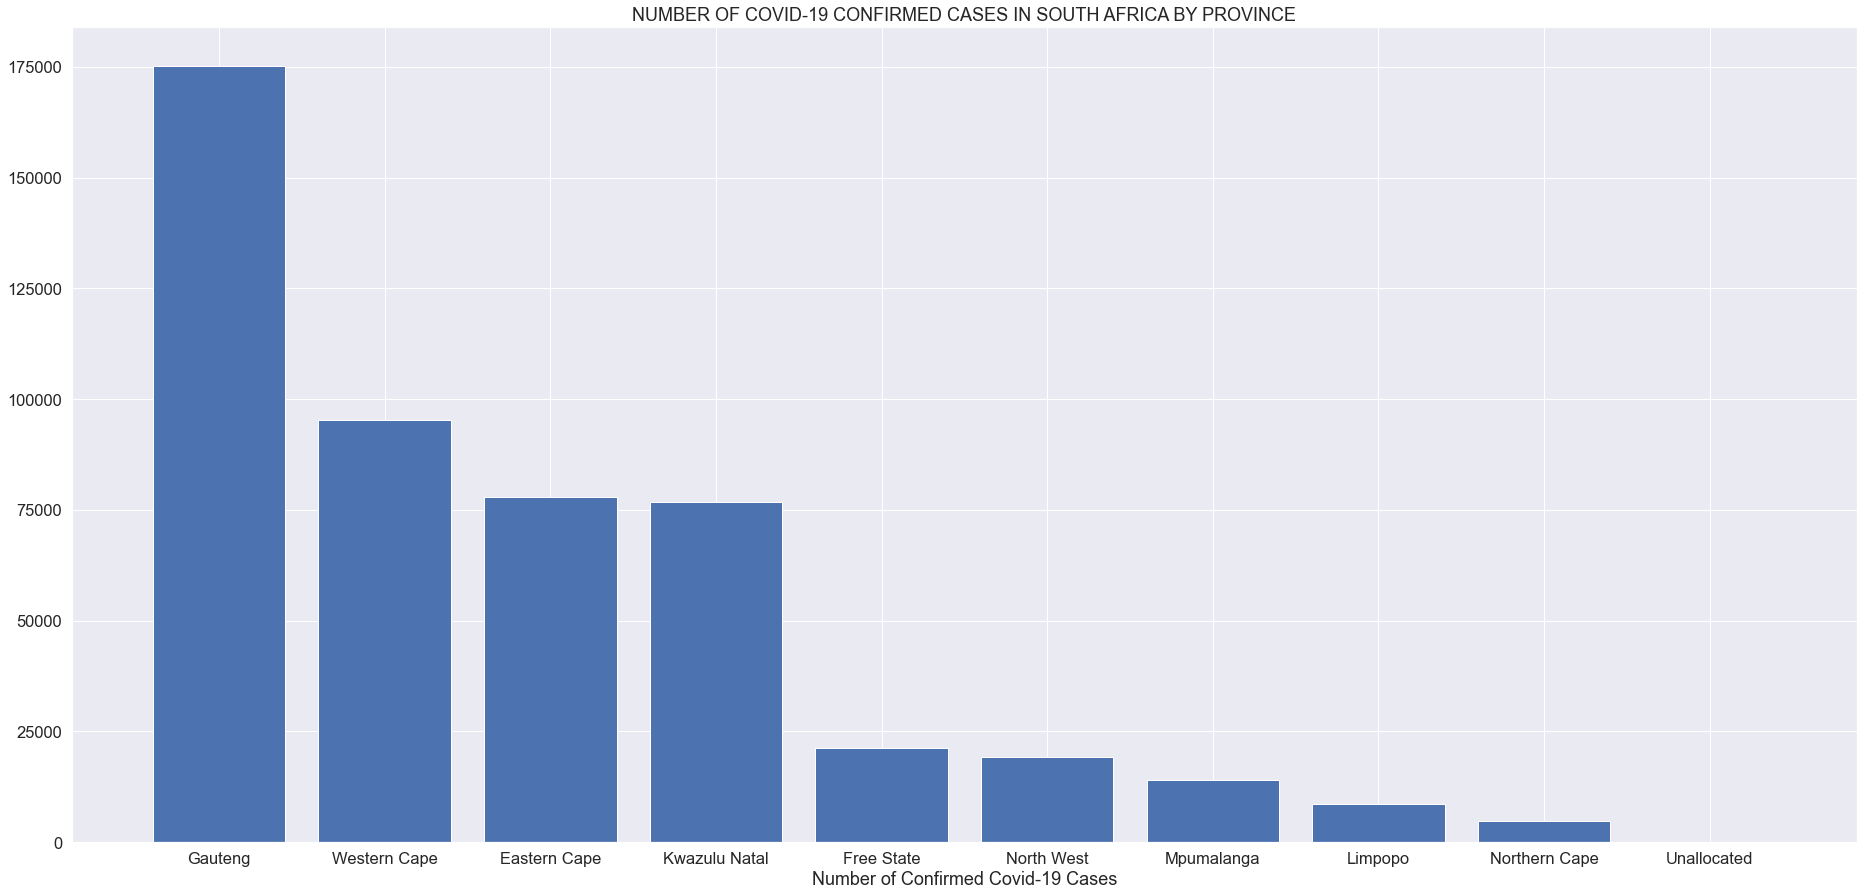

In [101]:
#Ploting a bar graph to see the total of confirmed cases in different provinces
plt.figure(figsize =(32, 15))
plt.bar(UNIQ_Prov, confirmed_province_cases)
plt.title('NUMBER OF COVID-19 CONFIRMED CASES IN SOUTH AFRICA BY PROVINCE')
plt.xlabel('Number of Confirmed Covid-19 Cases')
plt.show()

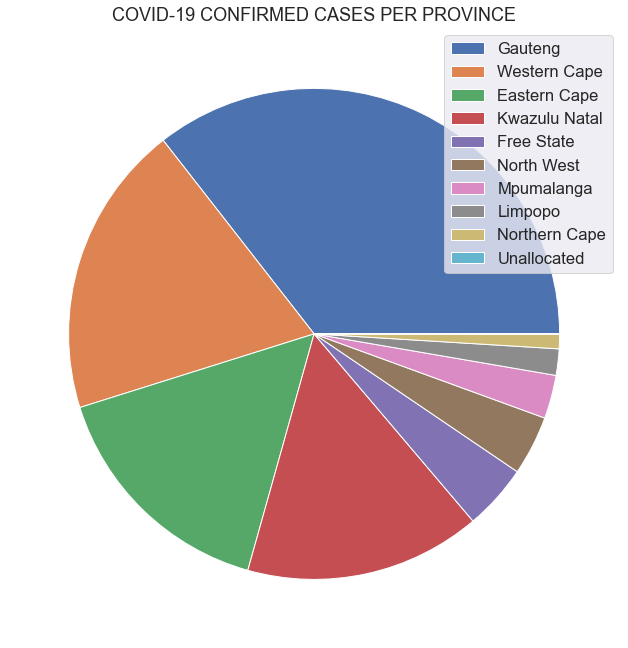

In [102]:
#ploting a pie chart to see total confirmed cases in different Provinces
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(UNIQ_Prov))
plt.figure(figsize=(11,12))
plt.title('COVID-19 CONFIRMED CASES PER PROVINCE')
plt.pie(confirmed_province_cases)
plt.legend(UNIQ_Prov)
plt.show()

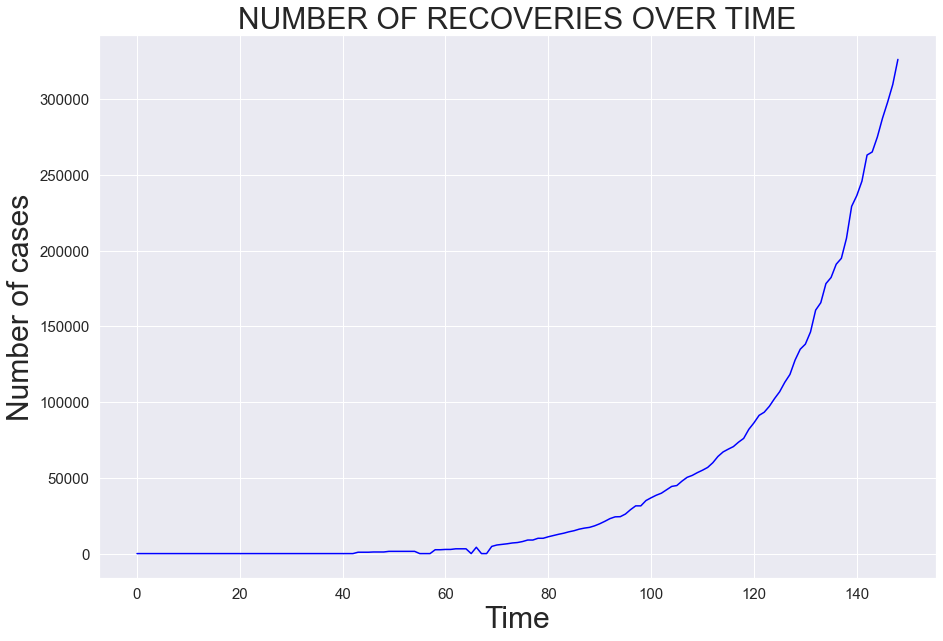

In [105]:
#ploting the recovery cases over time
plt.figure(figsize=(15, 10))
plt.plot(adjusted_dates, sum_recovered, color='blue')
plt.title('NUMBER OF RECOVERIES OVER TIME', size=30)
plt.xlabel('Time', size=30)
plt.ylabel("Number of cases", size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

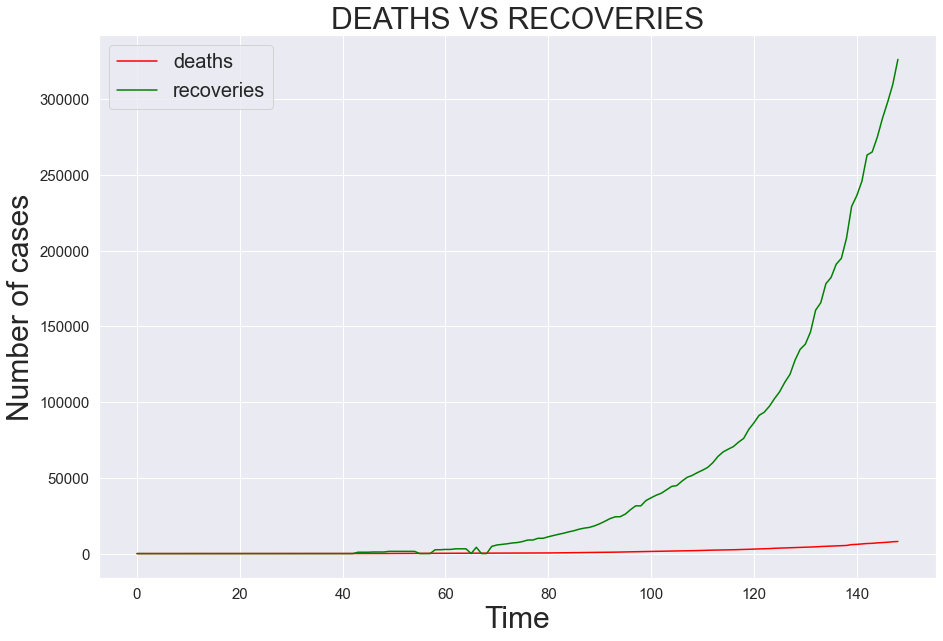

In [106]:
#ploting number of recovery coronavirus cases against number of deaths
plt.figure(figsize=(15, 10))
plt.plot(adjusted_dates, sum_deaths, color='red')
plt.plot(adjusted_dates, sum_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('DEATHS VS RECOVERIES', size=30)
plt.xlabel('Time', size=30)
plt.ylabel("Number of cases", size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

#                    Building Machine Learning Models

In [107]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_5_03, Country_cases, test_size=0.25, shuffle=False)

# Linear Regression model

In [108]:
#Fiting the model with x train confirmed, and y train confirmed
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [109]:
#making prediction with x test confirmed and future forecast data and printing MAE & MSE
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 218511.03660879776
MSE: 60336314137.471214


In [110]:
linear_pred = linear_model.predict(future_forecast)

In [111]:
test_linear_pred = linear_model.predict(X_test_confirmed)

In [112]:
linear_pred

array([[-19171.68355856],
       [-18480.11912367],
       [-17788.55468878],
       [-17096.99025389],
       [-16405.425819  ],
       [-15713.86138411],
       [-15022.29694922],
       [-14330.73251433],
       [-13639.16807944],
       [-12947.60364455],
       [-12256.03920966],
       [-11564.47477477],
       [-10872.91033989],
       [-10181.345905  ],
       [ -9489.78147011],
       [ -8798.21703522],
       [ -8106.65260033],
       [ -7415.08816544],
       [ -6723.52373055],
       [ -6031.95929566],
       [ -5340.39486077],
       [ -4648.83042588],
       [ -3957.26599099],
       [ -3265.7015561 ],
       [ -2574.13712121],
       [ -1882.57268632],
       [ -1191.00825143],
       [  -499.44381654],
       [   192.12061835],
       [   883.68505324],
       [  1575.24948812],
       [  2266.81392301],
       [  2958.3783579 ],
       [  3649.94279279],
       [  4341.50722768],
       [  5033.07166257],
       [  5724.63609746],
       [  6416.20053235],
       [  71

In [113]:
test_linear_pred

array([[57591.96871417],
       [58283.53314906],
       [58975.09758395],
       [59666.66201884],
       [60358.22645373],
       [61049.79088862],
       [61741.35532351],
       [62432.91975839],
       [63124.48419328],
       [63816.04862817],
       [64507.61306306],
       [65199.17749795],
       [65890.74193284],
       [66582.30636773],
       [67273.87080262],
       [67965.43523751],
       [68656.9996724 ],
       [69348.56410729],
       [70040.12854218],
       [70731.69297707],
       [71423.25741196],
       [72114.82184685],
       [72806.38628174],
       [73497.95071663],
       [74189.51515152],
       [74881.0795864 ],
       [75572.64402129],
       [76264.20845618],
       [76955.77289107],
       [77647.33732596],
       [78338.90176085],
       [79030.46619574],
       [79722.03063063],
       [80413.59506552],
       [81105.15950041],
       [81796.7239353 ],
       [82488.28837019],
       [83179.85280508]])

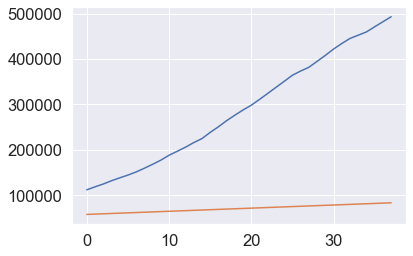

In [114]:
#ploting the values of y test confirmed and linear pred
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


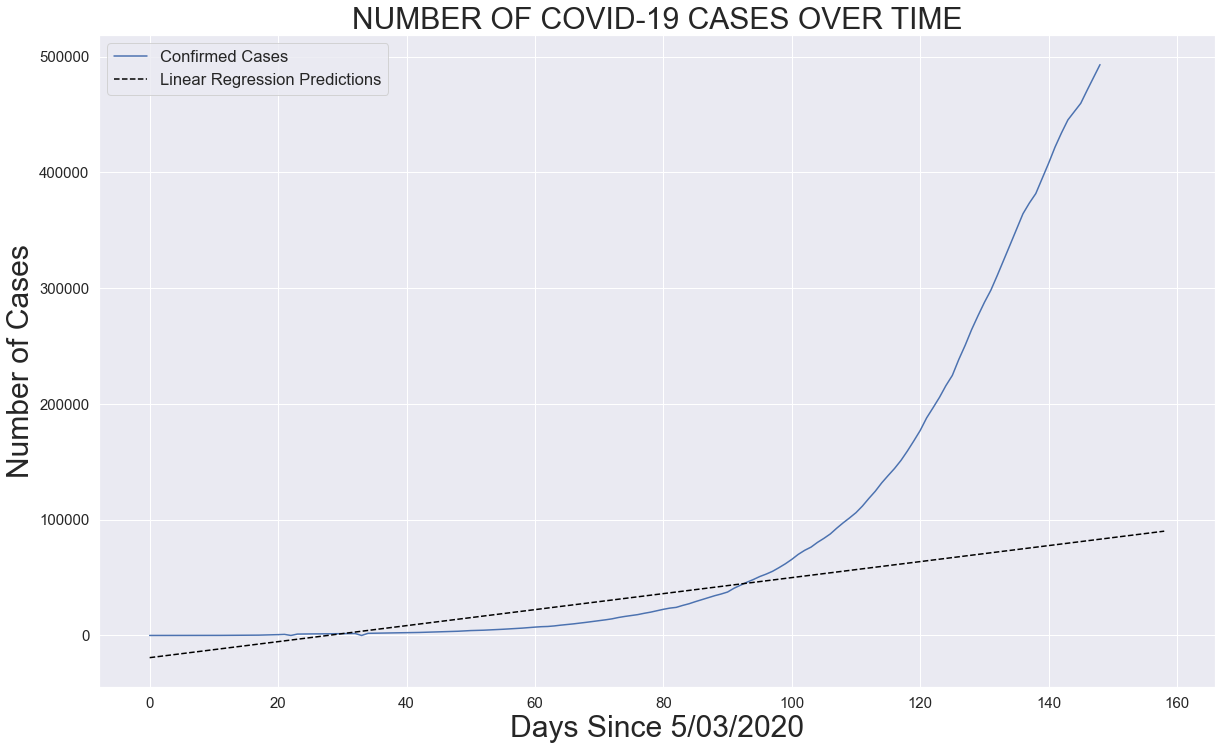

In [115]:
#total confirmed cases vs the predicted cases for the next 10 days
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, Country_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='black')
plt.title("NUMBER OF COVID-19 CASES OVER TIME", SIZE=30)
plt.xlabel("Days Since 5/03/2020", size=30)
plt.ylabel("Number of Cases", size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [116]:
#predicting the confirmed cases for the next 10 days using linear reg..
print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[83871.41723997]
 [84562.98167486]
 [85254.54610975]
 [85946.11054464]
 [86637.67497953]
 [87329.23941441]
 [88020.8038493 ]
 [88712.36828419]
 [89403.93271908]
 [90095.49715397]]


# Support Vector Machine model

In [117]:
#finding the best estimator and predicting the future forcast
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
#showing predicted values for all the dates
svm_pred

array([  1461.13622474,   1461.13623119,   1461.13643135,   1461.13779372,
         1461.14283644,   1461.15640206,   1461.18643237,   1461.24474321,
         1461.34779927,   1461.51748892,   1461.78189898,   1462.17608957,
         1462.74286888,   1463.53356803,   1464.60881581,   1466.03931357,
         1467.90660995,   1470.30387576,   1473.33667873,   1477.12375836,
         1481.79780071,   1487.5062132 ,   1494.41189946,   1502.69403408,
         1512.54883747,   1524.19035064,   1537.85121002,   1553.78342228,
         1572.25913911,   1593.57143205,   1618.0350673 ,   1645.98728051,
         1677.78855163,   1713.82337966,   1754.50105752,   1800.25644682,
         1851.55075264,   1908.87229847,   1972.73730086,   2043.69064423,
         2122.30665594,   2209.18988071,   2304.97585571,   2410.33188532,
         2525.95781584,   2652.58681037,   2790.98612375,   2941.95787684,
         3106.33983213,   3285.00616794,   3478.86825353,   3688.87542373,
         3916.01575385,  

MAE: 35305.76162000564
MSE: 1665569595.8330917


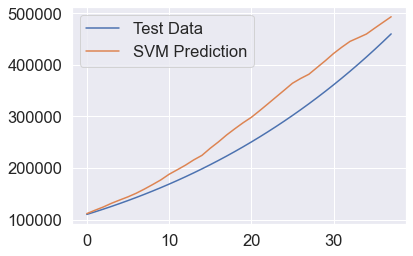

In [121]:
#checking values of the tesing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
plt.legend(['Test Data', 'SVM Prediction'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred, y_test_confirmed))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


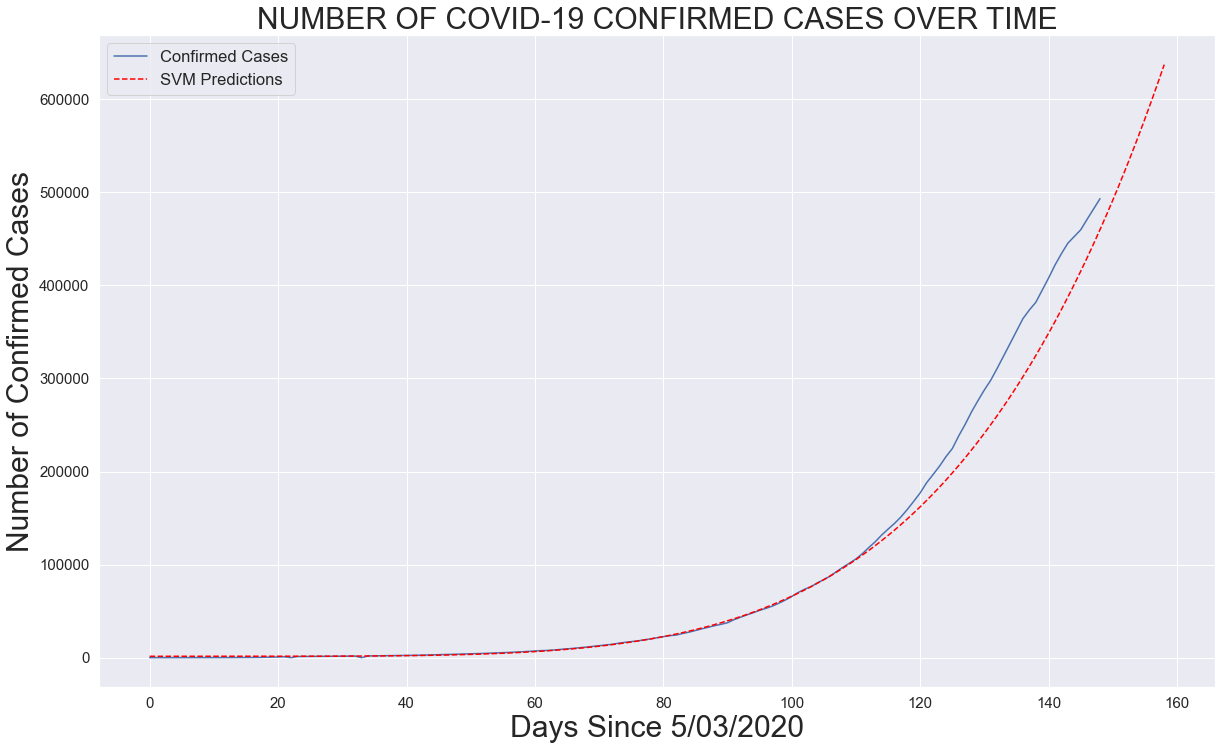

In [80]:
#total confirmed cases vs the predicted cases for the next 10 days
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, Country_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='red')
plt.title("NUMBER OF COVID-19 CONFIRMED CASES OVER TIME", SIZE=30)
plt.xlabel("Days Since 5/03/2020", size=30)
plt.ylabel("Number of Confirmed Cases", size=30)
plt.legend(['Confirmed Cases', 'SVM Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [62]:
#values of the predicted cases for the upcoming 10 days, using SVM model
print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('01/08/2020', 475642.85690306505),
 ('02/08/2020', 491770.0192184337),
 ('03/08/2020', 508333.0213088878),
 ('04/08/2020', 525340.6381740458),
 ('05/08/2020', 542801.7615833171),
 ('06/08/2020', 560725.4013233073),
 ('07/08/2020', 579120.6855220683),
 ('08/08/2020', 597996.8617858775),
 ('09/08/2020', 617363.2977485545),
 ('10/08/2020', 637229.4818763621)}

In [63]:
df_SVM = pd.DataFrame({'Date': future_forecast_dates[-10:], 'Predicted Confirmed cases in SA': np.round(svm_pred[-10:])})

In [64]:
df_SVM.head(10)

,Date,Predicted Confirmed cases in SA
0,01/08/2020,475643.0
1,02/08/2020,491770.0
2,03/08/2020,508333.0
3,04/08/2020,525341.0
4,05/08/2020,542802.0
5,06/08/2020,560725.0
6,07/08/2020,579121.0
7,08/08/2020,597997.0
8,09/08/2020,617363.0
9,10/08/2020,637229.0


# Saving the work into an excel file format, for visualization and reporting in Tableau

In [65]:
RSA.to_excel("RSA Covid Analysis.xlsx", index=False)